## Assignment 6

## Shovan Biswas

## Short description of the database
Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

1. Brief Description: Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.  
   Reference: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis  


2. Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat  
   Note: This dataset is built in NetworkX.  


3. Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html  


Questions asked: What can you infer about the relationships between (1) the women, and (2) the social events?

Please provide your code and analysis in an Jupyter notebook stored in your GitHub repository.

In [2]:
# Packages

import pandas as pd
import numpy as np
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
%matplotlib inline

Load data and get basic information. I looked at below site, for getting an idea of the data structure.  
https://networkx.github.io/documentation/networkx-1.9.1/_modules/networkx/generators/social.html#davis_southern_women_graph)  

In [26]:
G = nx.davis_southern_women_graph()

print(nx.info(G))
print()
print("Is bipartite = ", nx.is_bipartite(G))
print("Is Connected = ", nx.is_connected(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625

Is bipartite =  True
Is Connected =  True


Print some vital information about the set of Women and Events.

In [247]:
Women = G.graph['top']
Events = G.graph['bottom']

print(Women)
print()
print("No. of women = " + str(len(Women)))
print()
print()
print(Events)
print()
print("No. of women = " + str(len(Events)))
print()

['Evelyn\nJefferson', 'Laura\nMandeville', 'Theresa\nAnderson', 'Brenda\nRogers', 'Charlotte\nMcDowd', 'Frances\nAnderson', 'Eleanor\nNye', 'Pearl\nOglethorpe', 'Ruth\nDeSand', 'Verne\nSanderson', 'Myra\nLiddel', 'Katherina\nRogers', 'Sylvia\nAvondale', 'Nora\nFayette', 'Helen\nLloyd', 'Dorothy\nMurchison', 'Olivia\nCarleton', 'Flora\nPrice']

No. of women = 18


['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']

No. of women = 14



From below Biadjacency matrix, we get a rough idea of which woman is tied to which event. However, for a better picture of how the women are acquainted with each other through the events, we'll construct a graph.

In [248]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, Women, Events))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


Below graph gives a better visualization of the acquaintanceship among the women via the events.

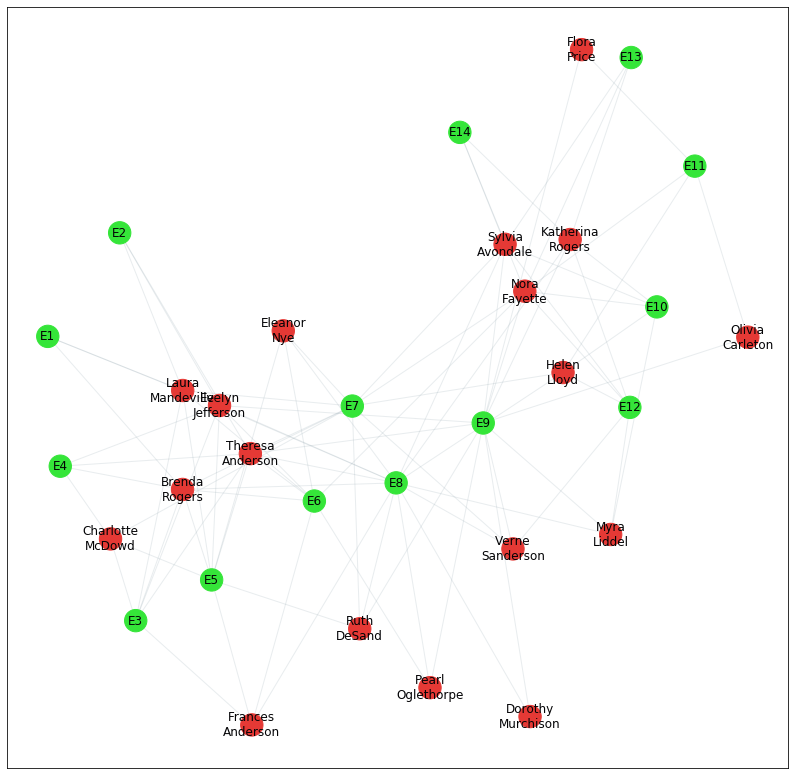

In [249]:
# add color to nodes
for node in Women:
    G.node[node]["class"] = "woman"
for node in Events:
    G.node[node]["class"] = "event"
    
color_map = {
    "event": "#35e539",
    "woman": "#e53935"
}

# add labels
label_map = {}
for event in Events:
    label_map[event] = event
for woman in Women:
    Women[Women.index(woman)] = woman.replace(" ", "\n")
    label_map[woman] = woman.replace(" ", "\n")
G2 = nx.relabel_nodes(G, label_map)

plt.figure(figsize = (14, 14))
positions = nx.spring_layout(G2, k = 0.55, iterations = 60)
position_labels = {}
keys = positions.keys()

for key in keys:
    px, py = positions[key]
    position_labels[key] = (px, py)

# plot the graph
nx.draw_networkx_labels(G2, position_labels, font_color = '#030305', font_size = 12)
nx.draw_networkx_edges(G2, positions, edge_color = "#90a4ae", alpha = 0.2)
nx.draw_networkx_nodes(G2, positions, node_color = [color_map[G2.node[node]['class']] for node in G2], node_size = 500)

plt.axis("on")
plt.show()

The graph seems to suggest that while events E8 and E9 brought most women together, the individuals Theresa, Evelyn and Nora attended most events. However, the below visualization confirms that guess more clearly.

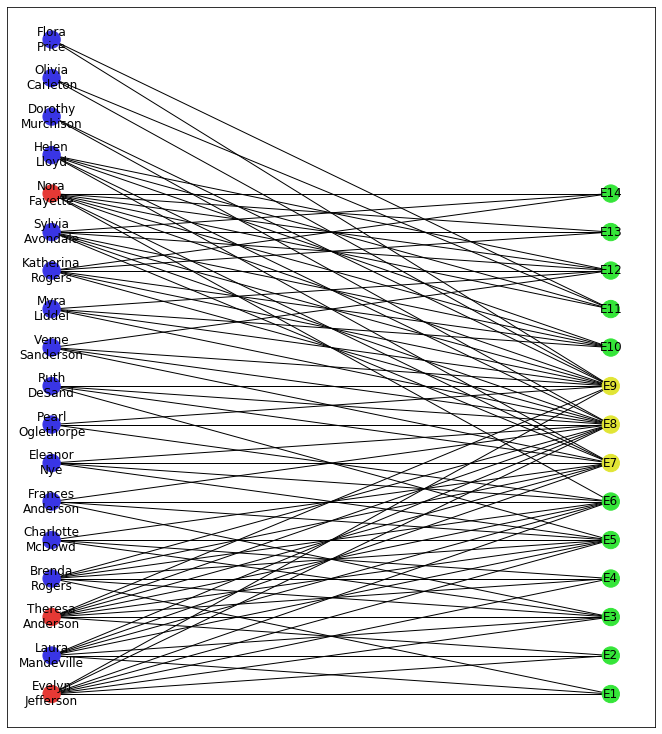

In [250]:
colors = []
for n, d in G.nodes(data = True):
    if d['bipartite'] == 1:    # bipartite = 1 indicates the Events
        if G.degree(n) > 9:
            colors.append('#e1e535')   
        else: 
            colors.append('#35e539')
    else:                      # bipartite = 0 indicates the Women                               
        if G.degree(n) > 7: 
            colors.append('#e53935')
        else:
            colors.append('#3935e5')

plt.figure(figsize = (9, 10))
pos = dict()
pos.update((n, (0, i * 10)) for i, n in enumerate(Women))
pos.update((n, (0.5, i * 10)) for i, n in enumerate(Events))

nx.draw(G2, pos, with_labels = True, node_color = colors)


plt.axis("on")
plt.show()

## Bar Chart Statistics

Since the set of women is small, we can afford to plot a bar chart showing the number of events attended by each woman.

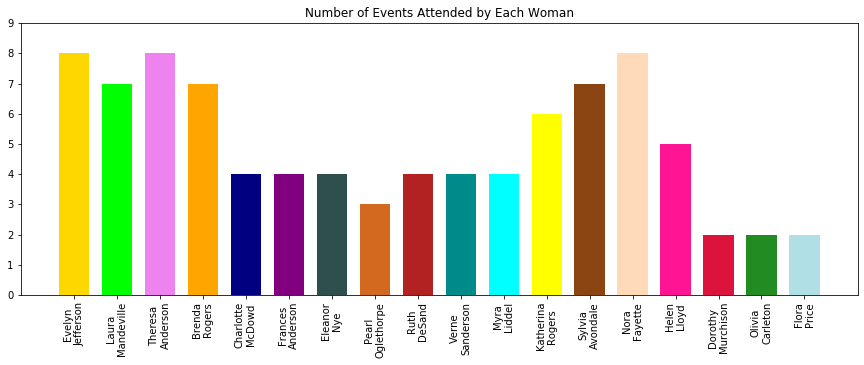

In [213]:
women_colors = {}
for woman in Women:
    women_colors[woman] = ["gold", "lime", "violet", "orange", "navy", "purple",
                          "darkslategrey", "chocolate", "firebrick", "darkcyan", "cyan", "yellow",
                          "saddlebrown", "peachpuff", "deeppink", "crimson", "forestgreen", "powderblue"][Women.index(woman)]
women_events = {}
for woman in Women:
    women_events[woman] = len(list(nx.all_neighbors(G, woman)))
    
plt.figure(figsize = (15, 5))
plt.bar(women_events.keys(), women_events.values(), width = 0.7, align = "center", color = [women_colors[woman] for woman in Women])
plt.xticks(rotation = 90)
plt.yticks(list(range(0, 10)))
plt.title("Number of Events Attended by Each Woman")

plt.axis("on")
plt.show()

This bar chart paints a clear picture about variations in sorority. Here also Theresa, Evelyn and Nora attended most events and Dorothy, Olivia and Flora attended least number of events.
  

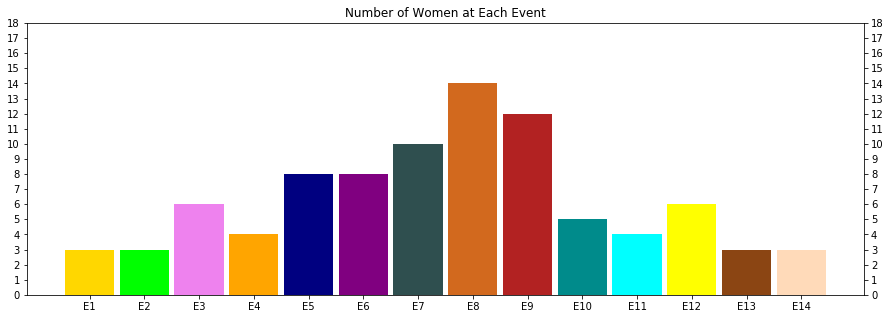

In [230]:
event_colors = {}
for event in Events:
    event_colors[event] = ["gold", "lime", "violet", "orange", "navy", "purple",
                          "darkslategrey", "chocolate", "firebrick", "darkcyan", "cyan", "yellow",
                          "saddlebrown", "peachpuff", "deeppink", "crimson", "forestgreen", "powderblue"][Events.index(event)]
event_attendees = {}
for event in Events:
    event_attendees[event] = len(list(nx.all_neighbors(G, event)))

plt.figure(figsize = (15, 5))
plt.bar(event_attendees.keys(), event_attendees.values(), width = 0.9, align = "center", color = [event_colors[event] for event in Events])
plt.yticks(list(range(0, 19)))
plt.tick_params(labelright = True, right = True)
plt.title("Number of Women at Each Event")

plt.axis("on")
plt.show()

Clearly, events E8 and E9 were most attended and events E1, E2, E13 and E14 were least attended.

Now, I'll modify the plot to eliminate the events, so as to visualize the direct relationships among the women.

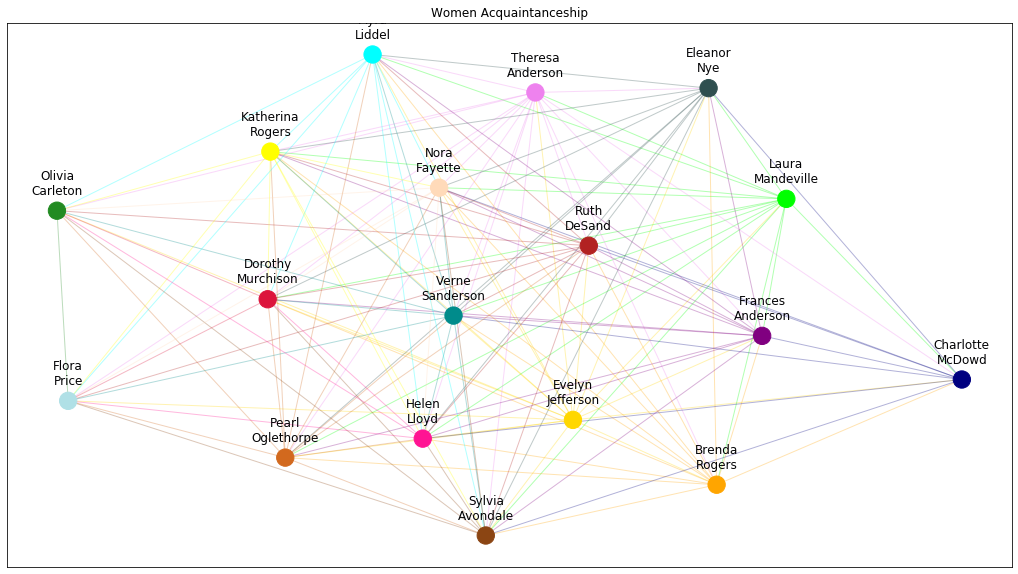

In [231]:
W = bipartite.projected_graph(G2, Women)
plt.figure(figsize = (18, 10))
positions = nx.spring_layout(W, k = 0.55, iterations = 60)
position_labels = {}

keys = positions.keys()

for key in keys:
    px, py = positions[key]
    position_labels[key] = (px, py + 0.065)

nx.draw_networkx_labels(W, position_labels, font_color = '#030305', font_size = 12)
nx.draw_networkx_edges(W, positions, edge_color = [women_colors[edge[0]] for edge in list(W.edges())], alpha = 0.3)
nx.draw_networkx_nodes(W, positions, node_color = [women_colors[node] for node in W], node_size = 300)


plt.title("Women Acquaintanceship")
plt.axis("on")
plt.show()

Now I'll compare the Evelyn Jefferson, a high performer with Olivia Carleton, a low performer

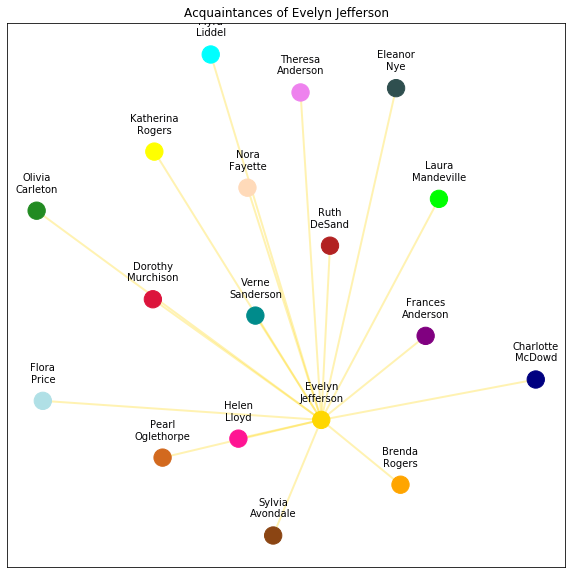

In [234]:
plt.figure(figsize = (10, 10))

nx.draw_networkx_labels(W, position_labels, font_color = '#030305', font_size = 10)
nx.draw_networkx_edges(W, positions, edgelist = [edge if "Evelyn\nJefferson" in edge else ("Evelyn\nJefferson", "Evelyn\nJefferson") for edge in list(W.edges())], edge_color = women_colors["Evelyn\nJefferson"], alpha = 0.3, width = 2)
nx.draw_networkx_nodes(W, positions, node_color = [women_colors[node] for node in W], node_size = 300)


plt.title("Acquaintances of Evelyn Jefferson")
plt.axis("on")
plt.show()

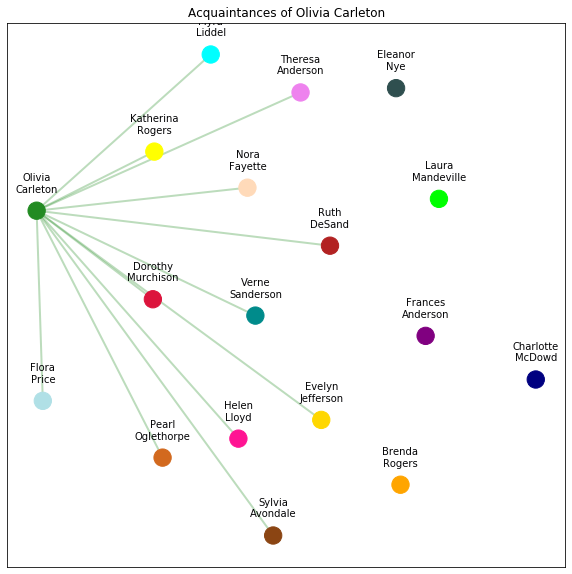

In [235]:
plt.figure(figsize = (10, 10))

nx.draw_networkx_labels(W, position_labels, font_color = '#030305', font_size = 10)
nx.draw_networkx_edges(W, positions, edgelist = [edge if "Olivia\nCarleton" in edge else ("Olivia\nCarleton", "Olivia\nCarleton") for edge in list(W.edges())], edge_color = women_colors["Olivia\nCarleton"], alpha = 0.3, width = 2)
nx.draw_networkx_nodes(W, positions, node_color = [women_colors[node] for node in W], node_size = 300)


plt.title("Acquaintances of Olivia Carleton")
plt.axis("on")
plt.show()

Now, I'll modify the code to observe the direct interconnections between events.

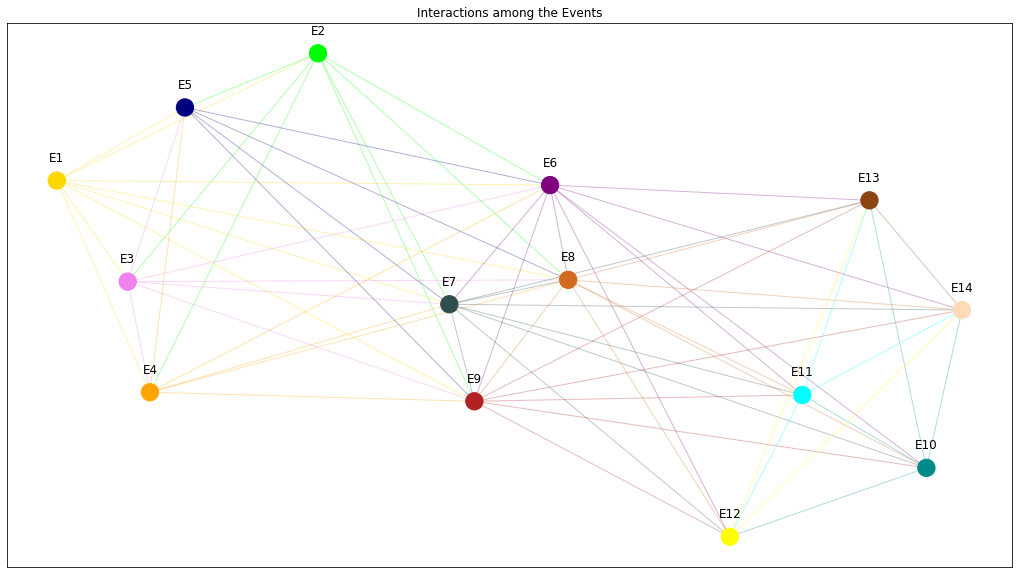

In [246]:
Ev = bipartite.projected_graph(G, Events)

plt.figure(figsize = (18, 10))
positions = nx.spring_layout(Ev, k = 0.55, iterations = 60)
position_labels = {}
keys = positions.keys()

for key in keys:
    px, py = positions[key]
    position_labels[key] = (px, py + 0.065)

nx.draw_networkx_labels(Ev, position_labels, font_color = '#030305', font_size=12)
nx.draw_networkx_edges(Ev, positions, edge_color = [event_colors[edge[0]] for edge in list(Ev.edges())], alpha = 0.3)
nx.draw_networkx_nodes(Ev, positions, node_color = [event_colors[node] for node in Ev], node_size = 300)

plt.title("Interactions among the Events")
plt.axis("on")
plt.show()

# Conclusion:
## Bimodal networks are relatively harder to analyze. So, it's more convenient to break up the two nodes to separate nodes and analyze them individually.  